# IMAGE COMPRESSION USING K-MEANS

## Day 18 of 110 Days of ML Challenge
### Project by Anjolaoluwa (Dataprincess)

![Pinterest Logo](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSxzPSOgtvk2CiTEV8kWEXJIdiOuTCUBtUg0Q&usqp=CAU)

 Scenario:

I'm a Machine Learning Engineer at Pinterest (A social media platform that allows users to upload and share photos).

Pinterest Product team is looking for ways to enhance user experience by reducing image loading times without significantly sacrificing image quality.

As an ML engineer in the team, this is how I'll handle this problem:

-  Data Preparation
-  K-means Clustering
- Image Reconstruction
- Evaluate and Display

Let's go!





## Data Preparation

The data we'll be using is a simple image of the sunset

![sunset image](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Cape_may.jpg/640px-Cape_may.jpg)

In [23]:
# Import necessary libraries
import numpy as np
from PIL import Image

In [24]:
# Load the image
image_path = "/content/sunset wiki.jpg"
image = Image.open(image_path)

### Feature Extraction

We'll flatten the image matrix into a 1D numpy array, where each element represents the pixel intensity of a specific channel (R, G, B)

In [25]:
# Convert the image to a numpy array
image_array = np.array(image)

# Flatten the image array
pixels = image_array.reshape(-1, 3)


## K-Means Clustering

In [26]:
# Load required libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalize pixel values to [0, 1]
scaler = StandardScaler()
normalized_pixels = scaler.fit_transform(pixels)

# Choose the number of clusters
K = 64

# Initialize K-means
kmeans = KMeans(n_clusters=K, random_state=0)

# Fit K-means to the normalized pixel data
kmeans.fit(normalized_pixels)

# Get cluster centers
cluster_centers = kmeans.cluster_centers_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Image Reconstruction

In [27]:
# Get cluster assignments for each normalized pixel
cluster_assignments = kmeans.predict(normalized_pixels)

# Replace normalized pixel values with cluster center values
compressed_normalized_pixels = cluster_centers[cluster_assignments]

# Rescale the compressed normalized pixels back to the original scale
compressed_pixels = scaler.inverse_transform(compressed_normalized_pixels)

# Reshape the compressed pixels back to the image shape
compressed_image_array = compressed_pixels.reshape(image_array.shape)
compressed_image = Image.fromarray(np.uint8(compressed_image_array))


## Evaluation and Display

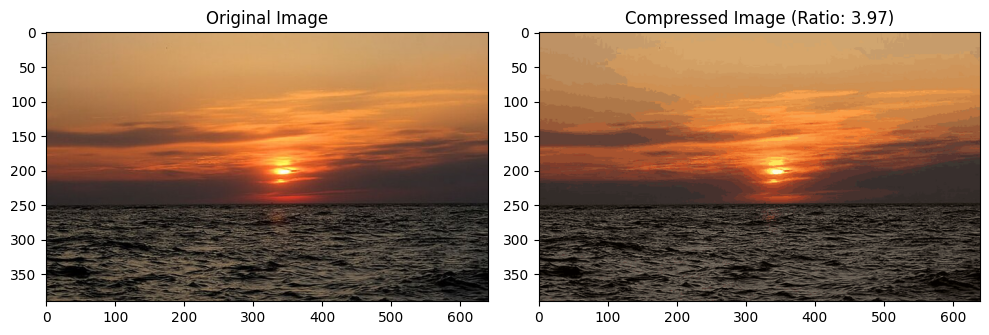

Orignal size: 731.25 kb 
Compressed size: 184.3125 kb


In [31]:
import matplotlib.pyplot as plt

# Calculate the sizes of the original and compressed data
original_size = pixels.nbytes
cluster_assignment_size = len(cluster_assignments) * np.ceil(np.log2(K)) / 8  # Size of cluster assignments in bytes
cluster_center_size = cluster_centers.nbytes

# Calculate the total compressed size
compressed_size = cluster_assignment_size + cluster_center_size

# Calculate the compression ratio
compression_ratio = original_size / compressed_size

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(compressed_image)
plt.title(f"Compressed Image (Ratio: {compression_ratio:.2f})")

plt.tight_layout()
plt.show()

print(f"Orignal size: {original_size/1024} kb \nCompressed size: {compressed_size/1024} kb")


## Namaste!